## Portfolio Value at Risk(VaR)

## Theoretical Description
This project analyzes the Value at Risk (VaR) for a portfolio of tech stocks (AAPL, MSFT, GOOGL, AMZN) using three different methodologies: Normal Distribution, Student's t-Distribution, and Historical Simulation. VaR is a statistical technique used to measure and quantify the level of financial risk within a portfolio over a specific time frame.



---


Installs the yfinance package, which is used to download historical market data from Yahoo Finance.

--quiet suppresses unnecessary output during installation.


---



In [42]:
!pip install --quiet yfinance



---


Imports all required libraries.

ticker list: contains stock symbols for Apple, Microsoft, Google, and Amazon.

weights: equal allocation for each stock in the portfolio (25% each).

Sets the data range from Jan 1, 2020 to today.

Creates a date-based DataFrame price to hold adjusted closing prices.

For each stock:

Tries to fetch data using yfinance.

If it fails, falls back to pandas_datareader and uses data from Stooq.

Fills missing data using forward fill (ffill) and backward fill (bfill)




---



In [43]:
import time
import yfinance as yf
import pandas_datareader as pdr
import numpy as np
import datetime as dt
import pandas as pd

ticker = ['AAPL','MSFT','GOOGL','AMZN']
weights = np.array([0.25,0.25,0.25,0.25])

start = dt.datetime(2020,1,1)
end = dt.datetime.today()

price = pd.DataFrame(index=pd.date_range(start,end))

for t in ticker:
  print(f"fetching{ticker}",end = "")
  try:
    df = yf.Ticker(ticker).history(start=start.strftime("%Y-%m-%d"),end = end.strftime("%Y-%m-%d"),auto_adjust=True,)
    series = df['Close']
    print("Y finance ",end="")
  except Exception as e:
    print(f"X yfinance ({e}); falling back to Stooq")
    df2 = pdr.DataReader(ticker,'stooq',start,end)
    df2 = df2.sort_index()
    series= df2['Close']

  price[ticker] = series
  time.sleep(1)

price = price.dropna(how='all').ffill().bfill()
print(price.tail())

fetching['AAPL', 'MSFT', 'GOOGL', 'AMZN']X yfinance ('list' object has no attribute 'upper'); falling back to Stooq
fetching['AAPL', 'MSFT', 'GOOGL', 'AMZN']X yfinance ('list' object has no attribute 'upper'); falling back to Stooq
fetching['AAPL', 'MSFT', 'GOOGL', 'AMZN']X yfinance ('list' object has no attribute 'upper'); falling back to Stooq
fetching['AAPL', 'MSFT', 'GOOGL', 'AMZN']X yfinance ('list' object has no attribute 'upper'); falling back to Stooq
              AAPL    MSFT   GOOGL    AMZN
2025-05-19  208.78  458.87  166.54  206.16
2025-05-20  206.86  458.17  163.98  204.07
2025-05-21  202.09  452.57  168.56  201.12
2025-05-22  201.36  454.86  170.87  203.10
2025-05-23  195.27  450.18  168.47  200.99




---


Calculates log returns and shows the first 5 rows


---



In [44]:
logR=np.log(price /price.shift(1)).dropna()
logR.head()

,AAPL,MSFT,GOOGL,AMZN
2020-01-03,-0.009737,-0.012360,-0.005243,-0.012213
2020-01-06,0.007879,0.002580,0.026304,0.014776
2020-01-07,-0.004666,-0.009299,-0.001935,0.002089
2020-01-08,0.015943,0.016008,0.007094,-0.007839
2020-01-09,0.021054,0.012240,0.010441,0.004788




---
Calculates and summarizes statistical properties for each stock’s log return:

Mean: average return.

Variance: how volatile the returns are.

Skew: symmetry of the distribution (positive/negative tail).

Kurtosis: peakedness of the distribution (high values = fat tails).


---




In [45]:
summary=pd.DataFrame({
    'Mean': logR.mean(),
    'Variance': logR.var(),
    'Skew': logR.skew(),
    'Kurtosis': logR.kurtosis()
})
summary

,Mean,Variance,Skew,Kurtosis
AAPL,0.000729,0.000425,0.021101,6.205990
MSFT,0.000794,0.000372,-0.163478,7.433061
GOOGL,0.000668,0.000431,-0.226302,3.635737
AMZN,0.000554,0.000524,-0.068525,4.163218




---

Plots the histogram of all log returns.

bins=50 splits the return range into 50 intervals.

Helps visualize whether returns are normally distributed or skewed.


---



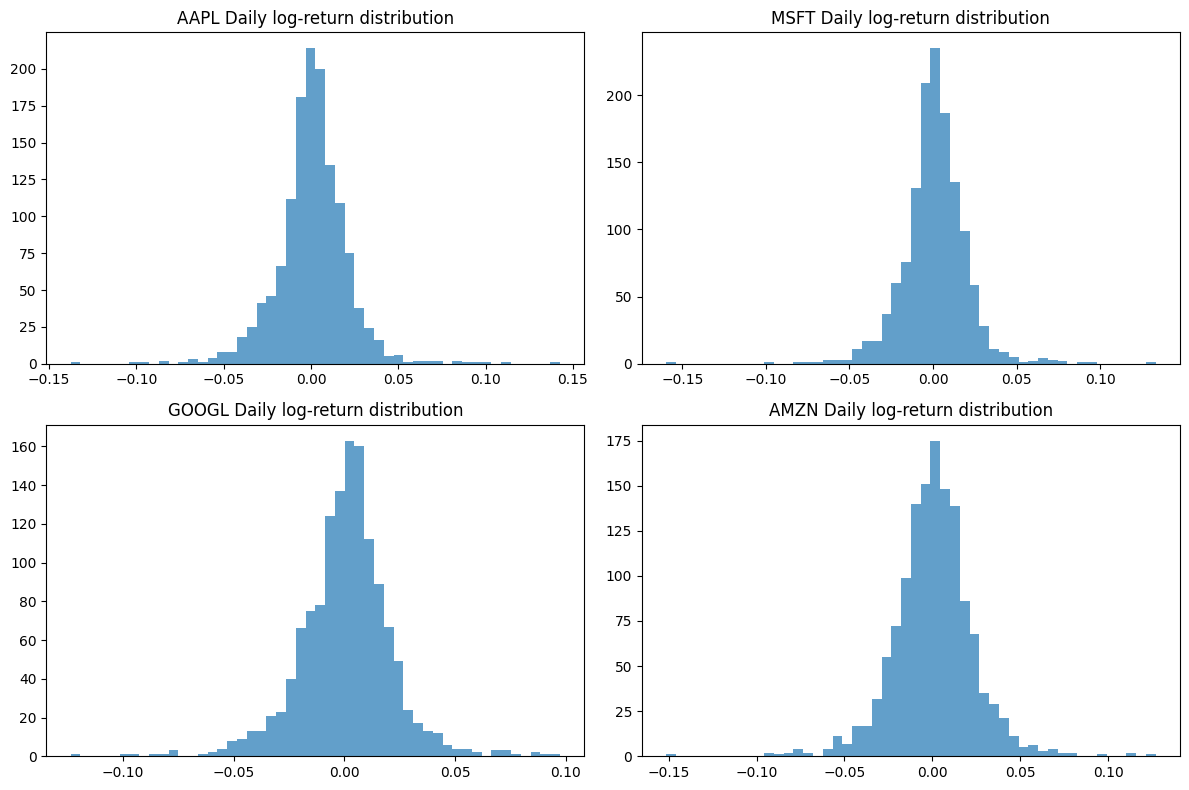

In [46]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0, 0].hist(logR['AAPL'], bins=50, alpha=0.7)
axes[0, 0].set_title("AAPL Daily log-return distribution")

axes[0, 1].hist(logR['MSFT'], bins=50, alpha=0.7)
axes[0, 1].set_title("MSFT Daily log-return distribution")

axes[1, 0].hist(logR['GOOGL'], bins=50, alpha=0.7)
axes[1, 0].set_title("GOOGL Daily log-return distribution")

axes[1, 1].hist(logR['AMZN'], bins=50, alpha=0.7)
axes[1, 1].set_title("AMZN Daily log-return distribution")

plt.tight_layout()
plt.show()



---

Computes 95% confidence intervals:

For the mean using the normal distribution.

For standard deviation using the chi-square distribution.

mu_norm and sigma_norm are the average and std dev of all stock returns (flattened).

z95 = 1.96 (critical z-value for 95%).

---



In [47]:
from scipy import stats
mu_norm,sigma_norm=logR.stack().mean(),logR.stack().std()
print(mu_norm,sigma_norm)
N=logR.size
z95=stats.norm.ppf(0.975)
ci_mu_norm=(mu_norm-z95*sigma_norm/np.sqrt(N),
            mu_norm+z95*sigma_norm/np.sqrt(N))
print(ci_mu_norm)
df=N-1
chi2_low,chi2_high=stats.chi2.ppf([0.025,0.975],df)
ci_sigma_norm=(sigma_norm/np.sqrt(chi2_low),
               sigma_norm/np.sqrt(chi2_high))
print(ci_sigma_norm)

0.0006859712775575028 0.020922220794094164
(np.float64(0.00012896995203800729), np.float64(0.0012429726030769982))
(np.float64(0.00028966985217469685), np.float64(0.0002789646523838673))




---

Converts 2D returns DataFrame into a 1D array for easier statistical fitting (like fitting a distribution).

---



In [48]:
returns_flat=logR.stack().values
returns_flat

array([-0.00973699, -0.01236019, -0.00524347, ..., -0.01034218,
       -0.01414534, -0.01044331])



---

Fits a Student’s t-distribution to the returns.

Outputs:

df_t: degrees of freedom

mu_t: mean

sigma_t: scale (similar to std dev)

Student’s t handles fat tails better than normal distribution.


---



In [49]:
# Fit student's t
df_t,mu_t,sigma_t=stats.t.fit(returns_flat)
print(df_t,mu_t,sigma_t)

3.660116438457905 0.0010340415786940123 0.014476880375190765




---

Bootstrapping technique:

Randomly resample return data 1000 times (with replacement).

Fit t-distribution for each resample.

Store estimates for later CI calculation.

---




In [50]:
B=1000
estimates=np.array([
    stats.t.fit(np.random.choice(returns_flat,size=N,replace=True))
    for _ in range(B)
])



---

Constructs confidence intervals from the bootstrap estimates for:

Mean (mu_t)

Std deviation (sigma_t)

np.percentile gets 2.5% and 97.5% bounds.

---



In [51]:
ci_mu_t=np.percentile(estimates[:,1],[2.5,97.5])
ci_sigma_t=np.percentile(estimates[:,2],[2.5,97.5])
print(ci_mu_t)
print(ci_sigma_t)

[0.00059753 0.00150132]
[0.01401775 0.01494804]




---

Computes portfolio returns as a weighted sum of log returns.
weights is a vector  [0.25, 0.25, 0.25,0.25] representing portfolio allocation.

---



In [52]:
portR=logR.dot(weights)
portR

,0
2020-01-03,-0.009888
2020-01-06,0.012885
2020-01-07,-0.003453
2020-01-08,0.007801
2020-01-09,0.012131
...,...
2025-05-19,0.000785
2025-05-20,-0.009112
2025-05-21,-0.005660
2025-05-22,0.006209




---
Calculates mean (mu_p) and sample standard deviation (sigma_p) of portfolio returns.

Used later to compute parametric VaR.


---



In [53]:
mu_p=portR.mean()
sigma_p=portR.std(ddof=1)
print(mu_p,sigma_p )

0.0006859712775575028 0.018162312831094218




---

Fetches the z-score corresponding to 5% in the standard normal distribution:
Used for calculating VaR at 95% confidence.

---



In [54]:
z05=stats.norm.ppf(0.05)

##Compute VaR using Normal Distribution


---

Computes Parametric VaR under normality assumption:

VaR(95%)=𝜇+𝜎⋅𝑧0.05
Interpreted as: "With 95% confidence, we don't expect a loss worse than VaR in 1 day".

---



In [55]:
vaR_norm=(mu_p+sigma_p*z05)
print(vaR_norm)

-0.029188374856495097


## Parametric VaR under Students's t Distribution


---

Fits Student's t again to all returns.

Uses the t-distribution to compute VaR:

VaR(𝑡)=−(𝜇𝑡+𝜎𝑡⋅𝑡0.05, 𝑑𝑓)

More conservative for fat-tailed data (heavier tails = higher risk).

---



In [56]:
df_t,mu_t,sigma_t=stats.t.fit(returns_flat)
print(df_t,mu_t,sigma_t)

t05=stats.t.ppf(0.05,df_t)
VaR_t=-(mu_t+sigma_t*t05)*1
print(VaR_t)

3.660116438457905 0.0010340415786940123 0.014476880375190765
0.030670593733411636


## Historical Method(non-parametric):


---

Uses actual data percentiles:

VaR(historical)=−5th percentile of returns

No assumption about distribution. Relies on past losses.

---



In [57]:
hist_var=-np.percentile(portR,5)
print(hist_var)

0.02892601519327567


### Hypothesis Test on Portfolio Return


---

Null Hypothesis (H₀): Mean return of portfolio = 0.

t-test checks if portfolio returns are significantly different from 0.

If p_val < 0.05, we reject H₀, suggesting non-zero mean return.

---



In [58]:
t_stat,p_val=stats.ttest_1samp(portR,0.0)
print(t_stat,p_val)
if p_val<0.05:
  print("Reject the null hypothesis")
else:
  print("Fail to reject the null hypothesis")

1.3902868899177394 0.16467026409734656
Fail to reject the null hypothesis


## Correlation Matrix & Diversification Benefit


---

Plots correlation heatmap between assets.

Then calculates diversification benefit:

Benefit=Weighted Std Dev−Portfolio Std Dev

Lower portfolio volatility implies better diversification.

---



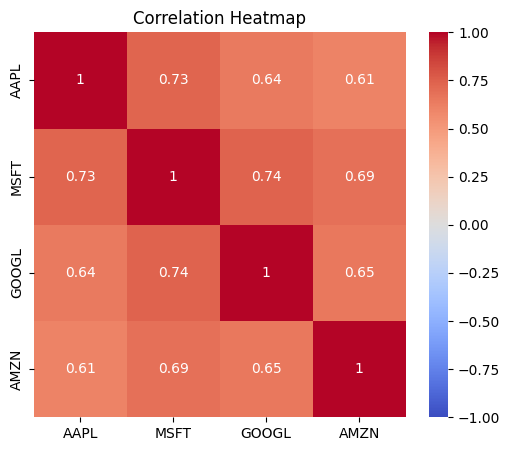

Weighted avg sigma: 0.0209
Actual Portfolio: 0.0182
Diversification benefit: 0.0027


In [59]:
import seaborn as sns

corr=logR.corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr,annot=True,cmap='coolwarm',vmin=-1,vmax=1)
plt.title('Correlation Heatmap')
plt.show()

sigma_i = logR.std()
sigma_weighted = np.dot(weights, sigma_i)
sigma_portfolio = sigma_p
print(f"Weighted avg sigma: {sigma_weighted:.4f}")
print(f"Actual Portfolio: {sigma_portfolio:.4f}")
print(f"Diversification benefit: {sigma_weighted-sigma_portfolio:.4f}")


## Cumulative Returns & Portfolio Growth


---

cum_ret: Calculates cumulative return of each asset.

cum_port: Calculates cumulative portfolio return by compounding daily returns:

---



In [60]:
cum_ret=(price/price.iloc[0]).prod(axis=1)
cum_port=(portR+1).cumprod()



---

Rolling Max: Keeps track of the highest portfolio value so far.

Drawdown: Measures the percentage drop from the peak.

Max Drawdown (MDD): Largest observed drawdown.

End Date: When the MDD occurred.

---



In [61]:
rolling_max=cum_port.cummax()
drawdown=(cum_port-rolling_max)/rolling_max
max_dd=drawdown.min()
end_date=drawdown.idxmin()



---

Line chart for cumulative portfolio value.

Red shaded area shows when portfolio is in drawdown.

---



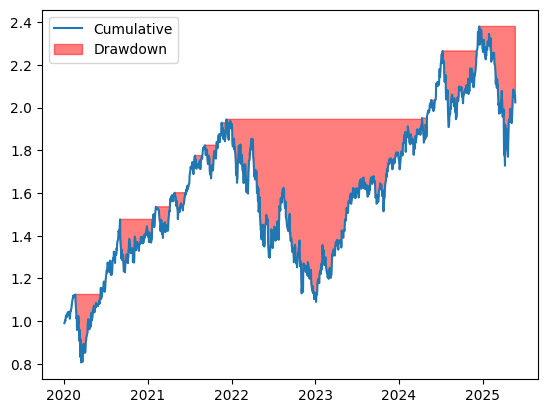

In [62]:
plt.plot(cum_port,label='Cumulative')
plt.fill_between(drawdown.index,cum_port,rolling_max,where=drawdown<0,color='red',alpha=0.5,label='Drawdown')
plt.legend()
plt.show()

## Expected Shortfall (ES) Calculation


---

Expected Shortfall (ES) = expected loss given that VaR is breached.

ES_historical: Mean of worst 5% returns (non-parametric).

ES_norm: ES using normal distribution:

ES(norm)=𝜇+𝜎⋅𝜙(𝑧)/𝛼

where
𝜙(𝑧) is the standard normal PDF at VaR point.

---



In [63]:
alpha=0.5 ## ES at beyond 95%
#hisorical
ES_historical=-portR[portR<=np.percentile(portR,5)].mean()

##normal method
ES_norm=(mu_p+sigma_p*stats.norm.pdf(z05)/alpha)
print(ES_historical,ES_norm)

0.04229930509930111 0.004432334806622952


#Backtesting VaR (Actual vs Expected Loss Events)


---

Calculates rolling VaR for each day (using 1-day rolling window).

exc: Checks how many times actual loss exceeded VaR.

Expected: ~5% exceedance if VaR is accurate.

---



In [64]:
var_series=-(portR.rolling(1).mean()*portR.rolling(1).std()*z05)
#Normal distribution vaR
exc=portR<-vaR_norm
num_exc=exc.sum()
total=len(portR)
print(num_exc/total)

0.9616236162361623


## Rolling Historical VaR Plot


---

Uses 60-day rolling window to calculate historical VaR dynamically.

Plots rolling 5th percentile vs constant parametric VaR.

---



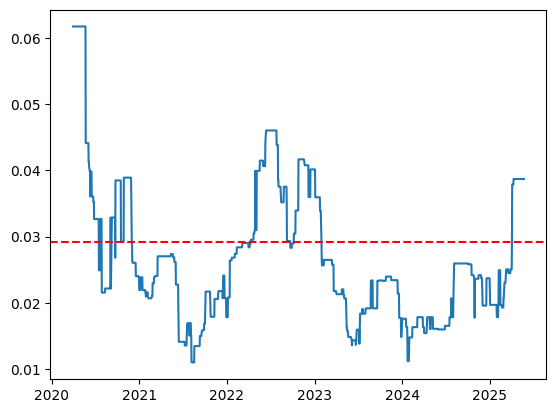

In [65]:
window=60
roll_var=portR.rolling(window).quantile(0.05).dropna()
plt.plot(-roll_var)
plt.axhline(-vaR_norm,color='r',linestyle='--')
plt.show()

## Normality Test of Portfolio Returns(Jarque-Bera test)


---

Jarque-Bera Test checks if returns are normally distributed.

Null Hypothesis (H₀): Data is normally distributed.

If p < 0.05: reject H₀ → returns are not normal (bad for parametric VaR).

---





In [66]:
jb_stat,jb_p=stats.jarque_bera(portR)
print(jb_stat,jb_p)
if jb_p<0.05:
  print("Reject the null hypothesis")
else:
  print("Fail to reject the null hypothesis")

1190.1913096186183 3.5747107942082975e-259
Reject the null hypothesis


#Portfolio VaR & Risk Analysis – Summary
 1. Log Returns Calculation

Why?: Log returns are additive and better for modeling.

How?: np.log(price / price.shift(1))

 2. Portfolio Return
Computed weighted average of asset returns using portfolio weights.

 3. VaR (Value at Risk) Estimation
Parametric (Normal): Assumes normal distribution of returns.

t-Distribution: More realistic, allows for fat tails.

Historical: Uses actual past returns, no distribution assumed.

 4. Bootstrapping VaR
Simulates thousands of return samples to estimate VaR more robustly.

 5. Hypothesis Testing
Used t-test to check if portfolio returns are significantly different from 0.

 6. Correlation & Diversification
Checked correlation between assets to understand diversification benefit.

Less correlation = better diversification = lower risk.

 7. Drawdown & Maximum Drawdown
Drawdown: Drop from peak value.

Max Drawdown: Worst drop — tells you how bad losses got.

 8. Expected Shortfall (ES)
Tells you the average loss beyond the VaR threshold (i.e., worst-case scenario).

 9. VaR Backtesting
Checked how often actual losses exceeded predicted VaR.

If exceedances > 5%, VaR might be underestimating risk.

 10. Rolling Historical VaR
Visualized how historical VaR (5% quantile) changes over time using a 60-day window.

 11. Normality Test (Jarque-Bera)
Tested if returns follow normal distribution.

Often rejected, which justifies using t-distribution or historical methods.




